# Identifying crops 


* **1. Introduction**
* **2. Data preparation**
    * 2.1 Load data
    * 2.2 Check for null and missing values
    * 2.3 Normalization
    * 2.4 Reshape
    * 2.5 Label encoding
* **3. CNN**
    * 3.1 Define the model
    * 3.2 Set the optimizer 
    * 3.3 Evaluated on test data

# 1. Introduction

This is a 5 layers Sequential Convolutional Neural Network for agriculture crop images and classify them as crop labels from 0 to 4 which yielded a result of 0.64 percent. Similar thing can be done for larger level with more crops to work according to the problem statement and then use satellite imagery to work on the data and then find valuable agricultural insights such as predicted yield, prices, etc benefitting the stakeholders namely farmers, govt., businesses and eventually you and me.



In [1]:
#importing the necessary libraires 
import pandas as pd
import numpy as np
import seaborn as sns
import PIL
import warnings
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from PIL import Image
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
%matplotlib inline
np.random.seed(0)
sns.set(style='white', context='notebook', palette='deep')

In [3]:
train=pd.read_csv('/kaggle/input/agriculture-crop-images/Crop_details.csv')
test=pd.read_csv('/kaggle/input/testssss/testdata.csv')

4    203
3    199
0    199
1    199
2    199
Name: croplabel, dtype: int64

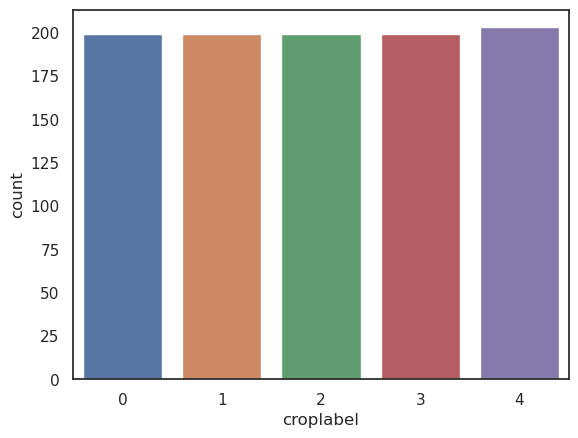

In [4]:
Y_train=train['croplabel']
X_train=train.drop(labels=['croplabel'],axis=1)
g=sns.countplot(x=Y_train)
Y_train.value_counts()

# 2. Null values ?

In [5]:
(X_train=='NaN').any()
(Y_train=='NaN').any()

False

In [6]:
X_train=X_train.drop(columns=['crop'],axis=0)
X_train=X_train.drop(columns=['Unnamed: 0'],axis=0)

In [7]:
def path_to_RGB(path :str):
   path=path.replace('/input','/input/agriculture-crop-images')
   img = Image.open(path)
   img = img.resize((28, 28))
   img_arr = np.array(img)
   img_arr = img_arr.reshape(28,28,3)
   return img_arr

def path_to_RGB_test(path :str):
   img = Image.open(path)
   img = img.resize((28, 28))
   img_arr = np.array(img)
   img_arr = img_arr.reshape(28,28,3)
   return img_arr




# 3. Normalizing

In [8]:
X_train['path']=X_train['path'].apply(path_to_RGB)
test['testpath']=test['testpath'].apply(path_to_RGB_test)
X_train['path']=X_train['path']/255
test['testpath']=test['testpath']/255

In [9]:
X_train['path'].shape

(999,)

In [10]:
X=[]
for x in X_train['path']:
    for j in x:
        for i in j:
            for a in i :
                X.append(a)

# 4. Reshaping 
# 5. Label Encoding

In [11]:
#resized and one hot encoding of the labels
X=np.asarray(X).reshape(999,28,28,3)
Y=Y_train
Y=to_categorical(Y,num_classes=5)

# CNN model 

In [12]:
# CNN model is defined
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))

# Set the optimizer

In [13]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
model.fit(X,Y,epochs=30)

Epoch 1/30


2024-08-10 10:27:56.332042: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


32/32 [==============================] - 7s 12ms/step - loss: 1.6576 - accuracy: 0.2002
Epoch 2/30
32/32 [==============================] - 0s 5ms/step - loss: 1.5454 - accuracy: 0.3203
Epoch 3/30
32/32 [==============================] - 0s 5ms/step - loss: 1.4162 - accuracy: 0.4314
Epoch 4/30
32/32 [==============================] - 0s 5ms/step - loss: 1.3137 - accuracy: 0.4615
Epoch 5/30
32/32 [==============================] - 0s 5ms/step - loss: 1.2319 - accuracy: 0.5015
Epoch 6/30
32/32 [==============================] - 0s 5ms/step - loss: 1.1578 - accuracy: 0.5325
Epoch 7/30
32/32 [==============================] - 0s 5ms/step - loss: 1.0955 - accuracy: 0.5726
Epoch 8/30
32/32 [==============================] - 0s 5ms/step - loss: 0.9803 - accuracy: 0.6126
Epoch 9/30
32/32 [==============================] - 0s 5ms/step - loss: 0.8998 - accuracy: 0.6697
Epoch 10/30
32/32 [==============================] - 0s 5ms/step - loss: 0.9904 - accuracy: 0.6837
Epoch 11/30
32/32 [==========

In [15]:
#Getting the desired things from the dataframe
X_test=test['testpath']
Y_test=test['croplabel']

In [16]:
X_test.shape

(51,)

In [17]:
#similar as done for the training data 
X_t=[]
for x in X_test:
    for j in x:
        for i in j:
            for a in i :
                X_t.append(a)

In [18]:
#resizing 
X_t=np.asarray(X_t).reshape(51,28,28,3)

In [19]:
Y_test=to_categorical(Y_test,num_classes=5)

# Evaluation

In [20]:
#evaluating the model performance
model.evaluate(X_t,Y_test)

2/2 [==============================] - 0s 90ms/step - loss: 3.2797 - accuracy: 0.4902


[3.279719352722168, 0.4901960790157318]